In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from module import MultinomialNBClassifier, RandomizedSearchCV, CrossValidation

In [2]:
data_frame = pd.read_csv('Cleaned_Data/datasheet_cleaned.csv')

In [3]:
def ubah(x):
    if x == 'neutral':
        return 2
    if x == 'negative':
        return 0
    if x == 'positive':
        return 1

In [4]:
# Extract texts and labels
texts = data_frame['full_text']
labels = data_frame['label']

In [5]:
# Convert text to numerical features
countvector = CountVectorizer()
X = countvector.fit_transform(texts)
X = X.toarray() if hasattr(X, "toarray") else X
y = labels.apply(ubah)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [6]:
X_train.shape, y_train.shape

((237, 1932), (237,))

In [7]:
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

# Model And Training Model

In [8]:
alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]
iter = 5

In [9]:
k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

In [10]:
best_score, best_param = RandomizedSearchCV(X_train_np, y_train_np, iter, k_folds, alpha_values)

Alpha: 0.1, Average CV Accuracy: 0.6578900709219859
Alpha: 0.5, Average CV Accuracy: 0.6495567375886525
Alpha: 1.0, Average CV Accuracy: 0.6325354609929078
Alpha: 1.5, Average CV Accuracy: 0.6326241134751773
Alpha: 2.0, Average CV Accuracy: 0.6282801418439716


In [11]:
classifier = MultinomialNBClassifier(alpha=best_param['alpha'])
classifier.fit(X_train, y_train)
classifier.show_process(X_test)


Instance 1:
Features: [0 0 0 ... 0 0 0]
  Class 'negative': Score = -219.04392378889966
  Class 'neutral': Score = -214.2022279554943
  Class 'positive': Score = -202.92959515205047
Predicted class: positive

Instance 2:
Features: [0 0 0 ... 0 0 0]
  Class 'negative': Score = -91.18216902627435
  Class 'neutral': Score = -92.0816538068875
  Class 'positive': Score = -101.59397289378529
Predicted class: negative

Instance 3:
Features: [0 0 0 ... 0 0 0]
  Class 'negative': Score = -27.9636401899042
  Class 'neutral': Score = -25.664019930942835
  Class 'positive': Score = -26.681014635794927
Predicted class: neutral

Instance 4:
Features: [0 0 0 ... 0 0 0]
  Class 'negative': Score = -120.94972856378712
  Class 'neutral': Score = -119.32564824839514
  Class 'positive': Score = -104.74704478029703
Predicted class: positive

Instance 5:
Features: [0 0 0 ... 0 0 0]
  Class 'negative': Score = -111.63221878966144
  Class 'neutral': Score = -103.99867086764577
  Class 'positive': Score = -11

In [12]:
print('Best Score: ', best_score)
print('Best Alpha: ', best_param['alpha'])

Best Score:  0.6578900709219859
Best Alpha:  0.1


In [13]:
classifier.info()

class priors: {'negative': 0.2489451476793249, 'neutral': 0.3459915611814346, 'positive': 0.4050632911392405}
feature probabilities: {'negative': array([1.55763240e-03, 7.41729714e-05, 7.41729714e-05, ...,
       8.15902685e-04, 7.41729714e-05, 7.41729714e-05]), 'neutral': array([8.00824611e-03, 7.92895655e-05, 7.92895655e-05, ...,
       7.92895655e-05, 8.72185220e-04, 8.72185220e-04]), 'positive': array([4.66536113e-03, 5.75970510e-05, 1.78550858e-03, ...,
       5.75970510e-05, 5.75970510e-05, 5.75970510e-05])}


# Testing and Overview

In [14]:
# Make predictions and evaluate the model
y_pred = classifier.predict(X_test)
y_pred.shape

(60,)

In [15]:
y_test = y_test.to_numpy().reshape((60,))

In [16]:
y_test.shape, y_pred.shape

((60,), (60,))

In [17]:
result_table = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
result_table

,y_pred,y_test
0,positive,neutral
1,negative,negative
2,neutral,neutral
3,positive,positive
4,neutral,neutral
5,positive,neutral
6,positive,positive
7,positive,positive
8,neutral,negative
9,neutral,neutral


In [18]:
report = classification_report(y_pred, y_test)

In [19]:
print(report)

              precision    recall  f1-score   support

    negative       0.62      0.73      0.67        22
     neutral       0.56      0.53      0.55        17
    positive       0.94      0.81      0.87        21

    accuracy                           0.70        60
   macro avg       0.71      0.69      0.69        60
weighted avg       0.72      0.70      0.70        60



In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7000


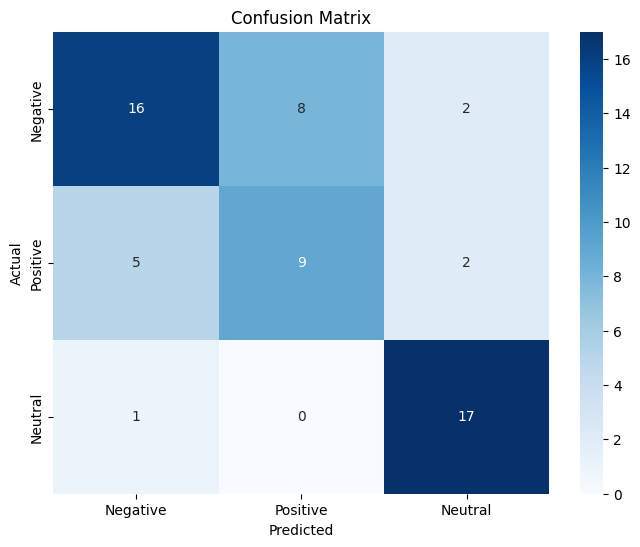

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

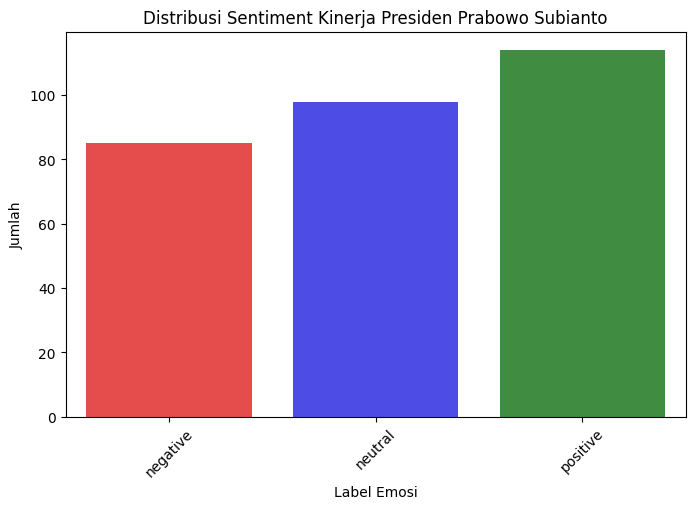

In [24]:
color_palette = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}

plt.figure(figsize=(8, 5))
bars = sns.countplot(data=data_frame, x='label', hue='label', order=['negative', 'neutral', 'positive'], palette=color_palette, dodge=False)
plt.legend([], [], frameon=False)  # Removes the legend
plt.title('Distribusi Sentiment Kinerja Presiden Prabowo Subianto')
plt.xlabel('Label Emosi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for bar in bars.patches:
    bar.set_alpha(0.8)

plt.show()

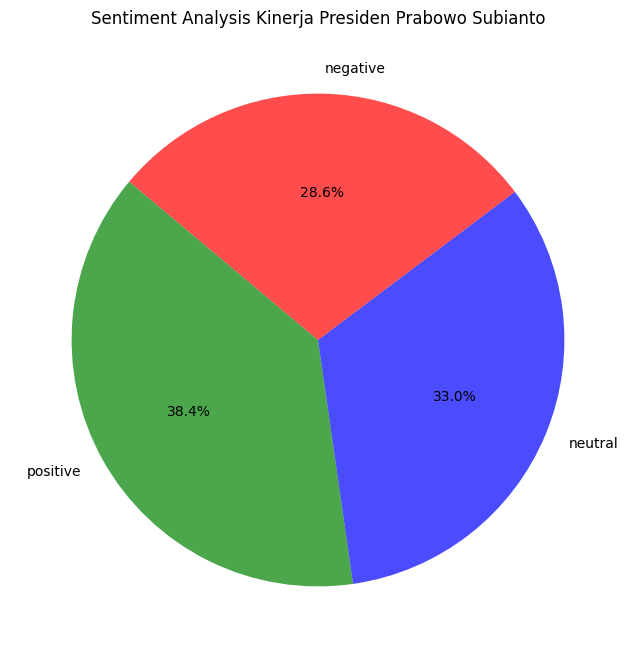

In [25]:
import matplotlib.colors as mcolors

label_counts = data_frame['label'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100

colors = [mcolors.to_rgba('green', alpha=0.7), 
          mcolors.to_rgba('blue', alpha=0.7), 
          mcolors.to_rgba('red', alpha=0.7)]

label_order = ['positive', 'neutral', 'negative']
label_percentages = label_percentages[label_order]
label_counts = label_counts[label_order]

plt.figure(figsize=(8, 8))
plt.pie(label_percentages, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Analysis Kinerja Presiden Prabowo Subianto')
plt.show()
